# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also because it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
from imblearn.over_sampling import ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from numpy import array, mean, std
from scipy.stats import ttest_ind_from_stats, uniform
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (
    cross_validate,
    cross_val_score,
    RandomizedSearchCV,
    StratifiedKFold,
)
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler

pd.set_option("display.max_columns", None)

In [3]:
# !pip install git+https://github.com/rossant/ipycache.git
# !pip install sklearn -U
# !pip install imblearn -U
# !pip install matplotlib -U
# !pip install numpy -U
# !pip install scipy -U
%load_ext ipycache
%load_ext blackcellmagic
%matplotlib inline

C:\Users\michen\anaconda3\lib\site-packages\IPython\config.py:12: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  warn("The `IPython.config` package has been deprecated since IPython 4.0. "
C:\Users\michen\anaconda3\lib\site-packages\ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


In [4]:
%%cache raw_data.pkl raw_data
raw_data = pd.read_csv("GermanCredit.csv")

[Skipped the cell's code and loaded variables raw_data from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\raw_data.pkl'.]


In [5]:
raw_data.info()
raw_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [6]:
%%cache data.pkl data y
data = raw_data.astype("category")
for column in [
    "Duration",
    "Amount",
    "InstallmentRatePercentage",
    "ResidenceDuration",
    "Age",
    "NumberExistingCredits",
    "NumberPeopleMaintenance",
]:
    data[column] = data[column].astype("int")
y = data.Class.replace("Good", 1).replace("Bad", -1)
data.drop("Class", axis="columns", inplace=True)

[Skipped the cell's code and loaded variables data, y from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\data.pkl'.]


In [7]:
print(y)
data.info()
data.head(5)

0      1
1     -1
2      1
3      1
4     -1
      ..
995    1
996    1
997    1
998   -1
999    1
Name: Class, Length: 1000, dtype: category
Categories (2, int64): [-1, 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Duration                                1000 non-null   int32   
 1   Amount                                  1000 non-null   int32   
 2   InstallmentRatePercentage               1000 non-null   int32   
 3   ResidenceDuration                       1000 non-null   int32   
 4   Age                                     1000 non-null   int32   
 5   NumberExistingCredits                   1000 non-null   int32   
 6   NumberPeopleMaintenance                 1000 non-null   int32   
 7   Telephone                               1000 non-null   category
 8   ForeignWorker   

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [8]:
print("Let's begin with a dummy classifier.")

Let's begin with a dummy classifier.


In [9]:
%%cache dummy.pkl dummy
dummy = DummyClassifier(strategy="most_frequent").fit(data, y).predict(data)
print("dummy ROC AUC:", roc_auc_score(y_true=y, y_score=dummy))
print(classification_report(y_true=y, y_pred=dummy))

[Skipped the cell's code and loaded variables dummy from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\dummy.pkl'.]
dummy ROC AUC: 0.5
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       300
           1       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



C:\Users\michen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\michen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\michen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
%%cache quick_dt_score.pkl quick_dt_score
quick_dt_score = cross_val_score(
    estimator=DecisionTreeClassifier(random_state=42),
    X=data,
    y=y,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
)

[Skipped the cell's code and loaded variables quick_dt_score from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\quick_dt_score.pkl'.]


In [11]:
print(
    "quick dt ROC AUC: {:.3f} ({:.3f})".format(mean(quick_dt_score), std(quick_dt_score))
)

quick dt ROC AUC: 0.596 (0.032)


In [12]:
print("Next, let's train a single decision tree with a hyperparameter search.")
dectree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": [None] + list(range(1, 101)),
        "min_samples_split": list(range(2, 101)),
        "min_samples_leaf": list(range(1, 101)),
        "min_weight_fraction_leaf": uniform(0, 0.5),
        "max_features": ["sqrt", "log2", None],
        "max_leaf_nodes": [None] + list(range(2, 101)),
        "class_weight": ["balanced", None],
    },
    n_iter=50,
    scoring="roc_auc",
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=10,
    random_state=42,
    return_train_score=True,
)

Next, let's train a single decision tree with a hyperparameter search.


In [13]:
%%cache dectree_scores.pkl dectree_scores
dectree_scores = cross_validate(
    estimator=dectree,
    X=data,
    y=y,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=10,
    return_train_score=True,
    return_estimator=True,
)

[Skipped the cell's code and loaded variables dectree_scores from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\dectree_scores.pkl'.]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.5s remaining:   42.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   28.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished


In [14]:
mean_std = lambda x: "%.3f (%.3f)" % (mean(x), std(x))
print("single decision tree results:")
print("mean fit time:", mean_std(dectree_scores["fit_time"]))
print("mean score time:", mean_std(dectree_scores["score_time"]))
print("mean train score:", mean_std(dectree_scores["train_score"]))
print("mean test score:", mean_std(dectree_scores["test_score"]))

single decision tree results:
mean fit time: 28.559 (0.057)
mean score time: 0.025 (0.008)
mean train score: 0.744 (0.016)
mean test score: 0.683 (0.026)


In [15]:
print("Now we have some performance indicators to beat.")
print("I would like to compare SMOTENC and ADASYN for oversampling.")
print("I would like to undersampling as well.")
print(
    "I would also like to compare PCA preprocessing with MinMaxScaler vs. StandardScaler."
)
print(
    "In addition, I would like to examine different orderings of these preprocessing steps."
)

Now we have some performance indicators to beat.
I would like to compare SMOTENC and ADASYN for oversampling.
I would like to undersampling as well.
I would also like to compare PCA preprocessing with MinMaxScaler vs. StandardScaler.
In addition, I would like to examine different orderings of these preprocessing steps.


In [16]:
# excludes categorical variables from scaling
transformer = lambda x: make_column_transformer(
    (x, make_column_selector(dtype_exclude="category"))
)

categorical_index = sorted(
    list(
        set(range(0, len(data.columns)))
        - {
            data.columns.get_loc(label)
            for label in {
                "Duration",
                "Amount",
                "InstallmentRatePercentage",
                "ResidenceDuration",
                "Age",
                "NumberExistingCredits",
                "NumberPeopleMaintenance",
            }
        }
    )
)

steps = {
    "under": RandomUnderSampler(random_state=42),
    "adasyn": ADASYN(random_state=42, n_jobs=-1),
    "smotenc": SMOTENC(
        categorical_features=categorical_index, random_state=42, n_jobs=-1
    ),
    "minmax": transformer(MinMaxScaler()),
    "stasca": transformer(StandardScaler()),
    "pca": PCA(random_state=42),
}

sampling_params = [
    "not minority",
    "not majority",
    "all",
]
o_params = sampling_params + ["minority"]
parameters = {
    "under": {
        "sampling_strategy": sampling_params + ["majority"],
        "replacement": [True, False],
    },
    "smotenc": {
        "sampling_strategy": o_params,
        "k_neighbors": list(range(2, 10)),
    },
    "adasyn": {
        "sampling_strategy": o_params,
        "n_neighbors": list(range(2, 10)),
    },
    "minmax": {},
    "stasca": {},
    "pca": {
        "n_components": [None, "mle"] + list(range(2, 7)),
        "whiten": [True, False],
        "svd_solver": ["auto", "full", "arpack", "randomized"],
    },
}

In [17]:
pipes = [
    "under",
    "smotenc",
    "adasyn",
    "under-smotenc",
    "under-adasyn",
    "smotenc-under",
    "adasyn-under",
    "minmax-pca",
    "stasca-pca",
    "under-smotenc-minmax-pca",
    "under-adasyn-minmax-pca",
    "smotenc-under-minmax-pca",
    "adasyn-under-minmax-pca",
    "minmax-under-smotenc-pca",
    "minmax-under-adasyn-pca",
    "minmax-smotenc-under-pca",
    "minmax-adasyn-under-pca",
    "minmax-under-pca-smotenc",
    "minmax-under-pca-adasyn",
    "minmax-smotenc-pca-under",
    "minmax-adasyn-pca-under",
    "minmax-pca-under-smotenc",
    "minmax-pca-under-adasyn",
    "minmax-pca-smotenc-under",
    "minmax-pca-adasyn-under",
    "under-minmax-smotenc-pca",
    "under-minmax-adasyn-pca",
    "smotenc-minmax-under-pca",
    "adasyn-minmax-under-pca",
    "under-minmax-pca-smotenc",
    "under-minmax-pca-adasyn",
    "smotenc-minmax-pca-under",
    "adasyn-minmax-pca-under",
    "under-minmax-pca",
    "minmax-under-pca",
    "minmax-pca-under",
    "smotenc-minmax-pca",
    "minmax-smotenc-pca",
    "minmax-pca-smotenc",
    "adasyn-minmax-pca",
    "minmax-adasyn-pca",
    "minmax-pca-adasyn",
    "under-smotenc-stasca-pca",
    "under-adasyn-stasca-pca",
    "smotenc-under-stasca-pca",
    "adasyn-under-stasca-pca",
    "stasca-under-smotenc-pca",
    "stasca-under-adasyn-pca",
    "stasca-smotenc-under-pca",
    "stasca-adasyn-under-pca",
    "stasca-under-pca-smotenc",
    "stasca-under-pca-adasyn",
    "stasca-smotenc-pca-under",
    "stasca-adasyn-pca-under",
    "stasca-pca-under-smotenc",
    "stasca-pca-under-adasyn",
    "stasca-pca-smotenc-under",
    "stasca-pca-adasyn-under",
    "under-stasca-smotenc-pca",
    "under-stasca-adasyn-pca",
    "smotenc-stasca-under-pca",
    "adasyn-stasca-under-pca",
    "under-stasca-pca-smotenc",
    "under-stasca-pca-adasyn",
    "smotenc-stasca-pca-under",
    "adasyn-stasca-pca-under",
    "under-stasca-pca",
    "stasca-under-pca",
    "stasca-pca-under",
    "smotenc-stasca-pca",
    "stasca-smotenc-pca",
    "stasca-pca-smotenc",
    "adasyn-stasca-pca",
    "stasca-adasyn-pca",
    "stasca-pca-adasyn",
]

In [18]:
tree_params = {
    "clf__criterion": ["gini", "entropy"],
    "clf__splitter": ["best", "random"],
    "clf__max_depth": [None] + list(range(1, 101)),
    "clf__min_samples_split": list(range(2, 101)),
    "clf__min_samples_leaf": list(range(1, 101)),
    "clf__min_weight_fraction_leaf": uniform(0, 0.5),
    "clf__max_features": ["sqrt", "log2", None],
    "clf__max_leaf_nodes": [None] + list(range(2, 101)),
    "clf__class_weight": ["balanced", None],
}

In [19]:
def test_pipeline(pipe):
    print("evaluating", pipe)
    step_keys = pipe.split("-")  # input pipe is split into keys for parameters
    pipe_params, pipe_steps = tree_params.copy(), []
    while step_keys:  # this loop adds steps and parameters according to the input pipe
        step = step_keys.pop(0)
        pipe_steps.append((step, steps[step]))
        step_parameters = parameters[step]
        for param in step_parameters.keys():
            pipe_params["__".join((step, param))] = step_parameters[param]
    score = cross_validate(  # nested CV
        estimator=RandomizedSearchCV(
            estimator=Pipeline(
                steps=pipe_steps + [("clf", DecisionTreeClassifier(random_state=42))]
            ),
            param_distributions=pipe_params,
            n_iter=50,
            scoring="roc_auc",
            cv=cv,
            verbose=10,
            random_state=42,
            n_jobs=-1,
        ),
        X=data,
        y=y,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        verbose=10,
        return_train_score=True,
    )
    return score

In [20]:
%%cache model_scores.pkl model_scores
model_scores = {pipe: test_pipeline(pipe) for pipe in pipes}

[Skipped the cell's code and loaded variables model_scores from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\model_scores.pkl'.]
evaluating under
evaluating smotenc
evaluating adasyn
evaluating under-smotenc
evaluating under-adasyn
evaluating smotenc-under
evaluating adasyn-under
evaluating minmax-pca
evaluating stasca-pca
evaluating under-smotenc-minmax-pca
evaluating under-adasyn-minmax-pca
evaluating smotenc-under-minmax-pca
evaluating adasyn-under-minmax-pca
evaluating minmax-under-smotenc-pca
evaluating minmax-under-adasyn-pca
evaluating minmax-smotenc-under-pca
evaluating minmax-adasyn-under-pca
evaluating minmax-under-pca-smotenc
evaluating minmax-under-pca-adasyn
evaluating minmax-smotenc-pca-under
evaluating minmax-adasyn-pca-under
evaluating minmax-pca-under-smotenc
evaluating minmax-pca-under-adasyn
evaluating minmax-pca-smotenc-under
evaluating minmax-pca-adasyn-und

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   41.0s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.8min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.8min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.1s remaining:   57.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   38.2s r

In [21]:
class Record:
    def __init__(self, name="", train=0, test=0, print_scores=True) -> None:
        self.name = name
        self.train, self.test = mean(train), mean(test)
        self.train_std, self.test_std = std(train), std(test)
        if self.train + self.test == 0:
            self.train_n = self.test_n = 0
        else:
            self.train_n, self.test_n = len(train), len(test)
        if print_scores:
            print("pipeline steps:", name)
            print("mean train scores:", "%.3f (%.3f)" % (self.train, self.train_std))
            print("mean test scores:", "%.3f (%.3f)" % (self.test, self.test_std))
            print()


# initialize
best_scores = {
    step: Record(print_scores=False)
    for step in {"under", "adasyn", "smotenc", "minmax", "stasca", "pca"}
}
best_test = best_train = second_best = Record(print_scores=False)

# save the best scores
for pipe, score in model_scores.items():
    steps = pipe.split("-")
    record = Record(name=pipe, train=score["train_score"], test=score["test_score"])
    if record.train > best_train.train:
        best_train = record
    if record.test > best_test.test:
        second_best = best_test
        best_test = record
        for step in best_scores.keys():
            if step in steps:
                best_scores[step] = record
    else:
        for step, recorded in best_scores.items():
            if step in steps and recorded.test < record.test:
                best_scores[step] = record

pipeline steps: under
mean train scores: 0.718 (0.027)
mean test scores: 0.689 (0.025)

pipeline steps: smotenc
mean train scores: 0.728 (0.018)
mean test scores: 0.691 (0.042)

pipeline steps: adasyn
mean train scores: 0.739 (0.033)
mean test scores: 0.690 (0.029)

pipeline steps: under-smotenc
mean train scores: 0.744 (0.035)
mean test scores: 0.690 (0.037)

pipeline steps: under-adasyn
mean train scores: 0.720 (0.015)
mean test scores: 0.686 (0.038)

pipeline steps: smotenc-under
mean train scores: 0.733 (0.016)
mean test scores: 0.698 (0.044)

pipeline steps: adasyn-under
mean train scores: 0.757 (0.025)
mean test scores: 0.698 (0.038)

pipeline steps: minmax-pca
mean train scores: 0.678 (0.014)
mean test scores: 0.614 (0.023)

pipeline steps: stasca-pca
mean train scores: 0.677 (0.045)
mean test scores: 0.577 (0.035)

pipeline steps: under-smotenc-minmax-pca
mean train scores: 0.624 (0.019)
mean test scores: 0.571 (0.035)

pipeline steps: under-adasyn-minmax-pca
mean train scores:

In [22]:
def print_train_and_test_scores(record):
    print("\ttrain score: {:.3f} ({:.3f})".format(record.train, record.train_std))
    print("\ttest score: {:.3f} ({:.3f})".format(record.test, record.test_std))
    print()
    
print("pipeline with best test score:", best_test.name)
print_train_and_test_scores(best_test)

print("pipeline with second best test score:", second_best.name)
print_train_and_test_scores(second_best)

print("pipeline with best train score:", best_train.name)
print_train_and_test_scores(best_train)

for component in best_scores:
    best = best_scores[component]
    print("best pipeline including {}:".format(component), best.name)
    print_train_and_test_scores(best)

pipeline with best test score: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

pipeline with second best test score: smotenc
	train score: 0.728 (0.018)
	test score: 0.691 (0.042)

pipeline with best train score: adasyn-under
	train score: 0.757 (0.025)
	test score: 0.698 (0.038)

best pipeline including adasyn: adasyn-under
	train score: 0.757 (0.025)
	test score: 0.698 (0.038)

best pipeline including smotenc: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

best pipeline including under: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

best pipeline including pca: smotenc-minmax-pca
	train score: 0.700 (0.006)
	test score: 0.619 (0.025)

best pipeline including stasca: stasca-pca-under-adasyn
	train score: 0.630 (0.029)
	test score: 0.605 (0.040)

best pipeline including minmax: smotenc-minmax-pca
	train score: 0.700 (0.006)
	test score: 0.619 (0.025)



In [23]:
print(
    "The best pipelines performed a few points better in testing than the first tuned tree I trained above."
)
print("Resampling maybe useful for this dataset.")
print("PCA did little to improve ROC AUC regardless of the scaler used.")
print(
    "Perhaps this is because some values of n_components (e.g., 'mle') were not compatible with those of svd_solver."
)
print()
print(
    "I was a little surprised SMOTENC worked at all, since I don't think it's meant to deal with one-hot encoded features."
)
print(
    "Similarly, I'm not certain ADASYN won't generate values between 0 and 1 for one-hot encoded features."
)

The best pipelines performed a few points better in testing than the first tuned tree I trained above.
Resampling maybe useful for this dataset.
PCA did little to improve ROC AUC regardless of the scaler used.
Perhaps this is because some values of n_components (e.g., 'mle') were not compatible with those of svd_solver.

I was a little surprised SMOTENC worked at all, since I don't think it's meant to deal with one-hot encoded features.
Similarly, I'm not certain ADASYN won't generate values between 0 and 1 for one-hot encoded features.


In [24]:
print("Next up is a quick look at the order of under/over sampling.")
print()

under_adasyn = model_scores["under-adasyn"]
under_adasyn = Record(
    name="under-adasyn",
    train=under_adasyn["train_score"],
    test=under_adasyn["test_score"],
)
adasyn_under = model_scores["adasyn-under"]
adasyn_under = Record(
    name="adasyn-under",
    train=adasyn_under["train_score"],
    test=adasyn_under["test_score"],
)
smotenc_under = model_scores["smotenc-under"]
smotenc_under = Record(
    name="smotenc-under",
    train=smotenc_under["train_score"],
    test=smotenc_under["test_score"],
)
under_smotenc = model_scores["under-smotenc"]
under_smotenc = Record(
    name="under-smotenc",
    train=under_smotenc["train_score"],
    test=under_smotenc["test_score"],
)


def welch_t(score1, score2):
    std1, std2 = score1.test_std, score2.test_std
    mean1, mean2 = score1.test, score2.test
    n1, n2 = score1.test_n, score2.test_n
    df = (((std1 ** 2) / n1 + (std2 ** 2) / n2) ** 2) / (
        ((((std1 ** 2) / n1) ** 2) / (n1 - 1)) + ((((std2 ** 2) / n2) ** 2) / (n2 - 1))
    )
    t, p = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    return "t({:.3f}) = {:.3f}, p = {:.3f}".format(df, t, p)

Next up is a quick look at the order of under/over sampling.

pipeline steps: under-adasyn
mean train scores: 0.720 (0.015)
mean test scores: 0.686 (0.038)

pipeline steps: adasyn-under
mean train scores: 0.757 (0.025)
mean test scores: 0.698 (0.038)

pipeline steps: smotenc-under
mean train scores: 0.733 (0.016)
mean test scores: 0.698 (0.044)

pipeline steps: under-smotenc
mean train scores: 0.744 (0.035)
mean test scores: 0.690 (0.037)



In [25]:
print("best vs. second best:", welch_t(best_test, second_best))
print()
print("adasyn-under vs. smotenc-under:", welch_t(adasyn_under, smotenc_under))
print("under-smotenc vs. under-adasyn:", welch_t(under_smotenc, under_adasyn))
print("under-smotenc vs. smotenc-under:", welch_t(under_smotenc, smotenc_under))
print("adasyn-under vs. under-adasyn:", welch_t(adasyn_under, under_adasyn))
print()
print("nothing remarkable...")

best vs. second best: t(7.988) = 0.272, p = 0.793

adasyn-under vs. smotenc-under: t(7.818) = -0.010, p = 0.992
under-smotenc vs. under-adasyn: t(7.993) = 0.153, p = 0.882
under-smotenc vs. smotenc-under: t(7.774) = -0.314, p = 0.762
adasyn-under vs. under-adasyn: t(7.999) = 0.478, p = 0.645

nothing remarkable...


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [26]:
# ! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [27]:
# Your code here! :)
from dtreeviz.trees import dtreeviz

In [28]:
%%cache dtree_params.pkl dtree_params
# fit the best pipeline from before and save the best parameters
dtree_params = (
    RandomizedSearchCV(
        estimator=Pipeline(
            steps=[
                (
                    "smotenc",
                    SMOTENC(
                        categorical_features=categorical_index,
                        random_state=42,
                        n_jobs=-1,
                    ),
                ),
                ("under", RandomUnderSampler(random_state=42)),
                ("clf", DecisionTreeClassifier(random_state=42)),
            ]
        ),
        param_distributions={
            **{
                "smotenc__sampling_strategy": [
                    "not minority",
                    "not majority",
                    "all",
                    "minority",
                ],
                "smotenc__k_neighbors": list(range(2, 10)),
                "under__sampling_strategy": [
                    "not minority",
                    "not majority",
                    "all",
                    "majority",
                ],
                "under__replacement": [True, False],
            },
            **tree_params,
        },
        n_iter=50,
        scoring="roc_auc",
        n_jobs=-1,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        random_state=42,
        return_train_score=True,
    )
    .fit(data, y)
    .best_params_
)
print(dtree_params)

[Skipped the cell's code and loaded variables dtree_params from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\dtree_params.pkl'.]
{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 92, 'clf__max_features': None, 'clf__max_leaf_nodes': 72, 'clf__min_samples_leaf': 61, 'clf__min_samples_split': 22, 'clf__min_weight_fraction_leaf': 0.07800932022121826, 'clf__splitter': 'best', 'smotenc__k_neighbors': 8, 'smotenc__sampling_strategy': 'all', 'under__replacement': True, 'under__sampling_strategy': 'majority'}


In [29]:
# dtreeviz needs a DecisionTreeClassifier, so I manually recreated the classifier from the parameters above
dtree = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=92,
    min_samples_split=22,
    min_samples_leaf=61,
    min_weight_fraction_leaf=0.07800932022121826,
    max_features=None,
    max_leaf_nodes=72,
    class_weight="balanced",
    random_state=42,
)
dtree.fit(
    *RandomUnderSampler(
        replacement=True, sampling_strategy="majority", random_state=42
    ).fit_resample(
        *SMOTENC(
            categorical_features=categorical_index,
            k_neighbors=8,
            sampling_strategy="all",
            random_state=42,
            n_jobs=-1,
        ).fit_resample(data, y)
    )
)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=92, max_leaf_nodes=72, min_samples_leaf=61,
                       min_samples_split=22,
                       min_weight_fraction_leaf=0.07800932022121826,
                       random_state=42)

In [30]:
viz = dtreeviz(
    dtree,
    data,
    y,
    target_name="good or bad",
    feature_names=data.columns,
    class_names=["good", "bad"],
)
viz.view()

C:\Users\michen\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[-1  1], y=[1, -1, 1, 1, -1, ..., 1, 1, 1, -1, 1]
Length: 1000
Categories (2, int64): [-1, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [31]:
print("It looks like whether or not someone has a checking account is pretty signficant for this tree.")

It looks like whether or not someone has a checking account is pretty signficant for this tree.


In [32]:
print("roc auc:", roc_auc_score(y_true=y, y_score=dtree.predict(data)))
print(classification_report(y_true=y, y_pred=dtree.predict(data)))

roc auc: 0.6326190476190476
              precision    recall  f1-score   support

          -1       0.55      0.41      0.47       300
           1       0.77      0.86      0.81       700

    accuracy                           0.72      1000
   macro avg       0.66      0.63      0.64      1000
weighted avg       0.71      0.72      0.71      1000



## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly they have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
%%cache quick_rf_score.pkl quick_rf_score
quick_rf_score = cross_val_score(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    X=data,
    y=y,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
)

[Skipped the cell's code and loaded variables quick_rf_score from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\quick_rf_score.pkl'.]


In [35]:
print(
    "quick rf ROC AUC: {:.3f} ({:.3f})".format(mean(quick_rf_score), std(quick_rf_score))
)

quick rf ROC AUC: 0.778 (0.013)


In [36]:
# This cell is the same as before except for forest_params
forest_params = {
    "clf__n_estimators": list(range(5, 500)),
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [None] + list(range(1, 101)),
    "clf__min_samples_split": list(range(2, 101)),
    "clf__min_samples_leaf": list(range(1, 101)),
    "clf__min_weight_fraction_leaf": uniform(0, 0.5),
    "clf__max_features": ["sqrt", "log2", None],
    "clf__max_leaf_nodes": [None] + list(range(2, 101)),
    "clf__bootstrap": [True, False],
    "clf__warm_start": [True, False],
    "clf__class_weight": ["balanced", "balanced_subsample", None],
}

# excludes categorical variables from scaling
transformer = lambda x: make_column_transformer(
    (x, make_column_selector(dtype_exclude="category"))
)

steps = {
    "under": RandomUnderSampler(random_state=42),
    "adasyn": ADASYN(random_state=42, n_jobs=-1),
    "smotenc": SMOTENC(categorical_features=categorical_index, random_state=42, n_jobs=-1),
    "minmax": transformer(MinMaxScaler()),
    "stasca": transformer(StandardScaler()),
    "pca": PCA(random_state=42),
}

sampling_params = [
    "not minority",
    "not majority",
    "all",
]
o_params = sampling_params + ["minority"]
parameters = {
    "under": {
        "sampling_strategy": sampling_params + ["majority"],
        "replacement": [True, False],
    },
    "smotenc": {
        "sampling_strategy": o_params,
        "k_neighbors": list(range(2, 10)),
    },
    "adasyn": {
        "sampling_strategy": o_params,
        "n_neighbors": list(range(2, 10)),
    },
    "minmax": {},
    "stasca": {},
    "pca": {
        "n_components": [None, "mle"] + list(range(2, 7)),
        "whiten": [True, False],
        "svd_solver": ["auto", "full", "arpack", "randomized"],
    },
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
def test_pipeline2(pipe):
    print("evaluating", pipe)
    step_keys = pipe.split("-")  # input pipe is split into keys for parameters
    pipe_params, pipe_steps = forest_params.copy(), []
    while step_keys:  # this loop adds steps and parameters according to the input pipe
        step = step_keys.pop(0)
        pipe_steps.append((step, steps[step]))
        step_parameters = parameters[step]
        for param in step_parameters.keys():
            pipe_params["__".join((step, param))] = step_parameters[param]
    score = cross_validate(  # nested CV
        estimator=RandomizedSearchCV(
            estimator=Pipeline(
                steps=pipe_steps
                + [
                    (
                        "clf",
                        RandomForestClassifier(n_jobs=-1, random_state=42, verbose=5),
                    )
                ]
            ),
            param_distributions=pipe_params,
            n_iter=50,
            scoring="roc_auc",
            cv=cv,
            verbose=10,
            random_state=42,
            n_jobs=-1,
        ),
        X=data,
        y=y,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        verbose=10,
        return_train_score=True,
    )
    return score

In [38]:
%%cache forest_model_scores.pkl forest_model_scores
forest_model_scores = {pipe: test_pipeline2(pipe) for pipe in pipes}

[Skipped the cell's code and loaded variables forest_model_scores from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\forest_model_scores.pkl'.]
evaluating under
evaluating smotenc
evaluating adasyn
evaluating under-smotenc
evaluating under-adasyn
evaluating smotenc-under
evaluating adasyn-under
evaluating minmax-pca
evaluating stasca-pca
evaluating under-smotenc-minmax-pca
evaluating under-adasyn-minmax-pca
evaluating smotenc-under-minmax-pca
evaluating adasyn-under-minmax-pca
evaluating minmax-under-smotenc-pca
evaluating minmax-under-adasyn-pca
evaluating minmax-smotenc-under-pca
evaluating minmax-adasyn-under-pca
evaluating minmax-under-pca-smotenc
evaluating minmax-under-pca-adasyn
evaluating minmax-smotenc-pca-under
evaluating minmax-adasyn-pca-under
evaluating minmax-pca-under-smotenc
evaluating minmax-pca-under-adasyn
evaluating minmax-pca-smotenc-under
evaluating minmax-

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.1min remaining: 13.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  9.1min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.0min r

In [39]:
# The code in this cell is the same as before.

# initialize
best_scores = {
    step: Record(print_scores=False)
    for step in {"under", "adasyn", "smotenc", "minmax", "stasca", "pca"}
}
best_test = best_train = second_best = Record(print_scores=False)

# save the best scores
for pipe, score in model_scores.items():
    steps = pipe.split("-")
    record = Record(name=pipe, train=score["train_score"], test=score["test_score"])
    if record.train > best_train.train:
        best_train = record
    if record.test > best_test.test:
        second_best = best_test
        best_test = record
        for step in best_scores.keys():
            if step in steps:
                best_scores[step] = record
    else:
        for step, recorded in best_scores.items():
            if step in steps and recorded.test < record.test:
                best_scores[step] = record

pipeline steps: under
mean train scores: 0.718 (0.027)
mean test scores: 0.689 (0.025)

pipeline steps: smotenc
mean train scores: 0.728 (0.018)
mean test scores: 0.691 (0.042)

pipeline steps: adasyn
mean train scores: 0.739 (0.033)
mean test scores: 0.690 (0.029)

pipeline steps: under-smotenc
mean train scores: 0.744 (0.035)
mean test scores: 0.690 (0.037)

pipeline steps: under-adasyn
mean train scores: 0.720 (0.015)
mean test scores: 0.686 (0.038)

pipeline steps: smotenc-under
mean train scores: 0.733 (0.016)
mean test scores: 0.698 (0.044)

pipeline steps: adasyn-under
mean train scores: 0.757 (0.025)
mean test scores: 0.698 (0.038)

pipeline steps: minmax-pca
mean train scores: 0.678 (0.014)
mean test scores: 0.614 (0.023)

pipeline steps: stasca-pca
mean train scores: 0.677 (0.045)
mean test scores: 0.577 (0.035)

pipeline steps: under-smotenc-minmax-pca
mean train scores: 0.624 (0.019)
mean test scores: 0.571 (0.035)

pipeline steps: under-adasyn-minmax-pca
mean train scores:

In [40]:
# same as before
print("pipeline with best test score:", best_test.name)
print_train_and_test_scores(best_test)

print("pipeline with second best test score:", second_best.name)
print_train_and_test_scores(second_best)

print("pipeline with best train score:", best_train.name)
print_train_and_test_scores(best_train)

for component in best_scores:
    best = best_scores[component]
    print("best pipeline including {}:".format(component), best.name)
    print_train_and_test_scores(best)

pipeline with best test score: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

pipeline with second best test score: smotenc
	train score: 0.728 (0.018)
	test score: 0.691 (0.042)

pipeline with best train score: adasyn-under
	train score: 0.757 (0.025)
	test score: 0.698 (0.038)

best pipeline including adasyn: adasyn-under
	train score: 0.757 (0.025)
	test score: 0.698 (0.038)

best pipeline including smotenc: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

best pipeline including under: smotenc-under
	train score: 0.733 (0.016)
	test score: 0.698 (0.044)

best pipeline including pca: smotenc-minmax-pca
	train score: 0.700 (0.006)
	test score: 0.619 (0.025)

best pipeline including stasca: stasca-pca-under-adasyn
	train score: 0.630 (0.029)
	test score: 0.605 (0.040)

best pipeline including minmax: smotenc-minmax-pca
	train score: 0.700 (0.006)
	test score: 0.619 (0.025)



In [41]:
print("The highest scoring pipeline for random forest scored the same as with the decision tree alone!")
print("This is unexpected since the random forest with default settings performed better even.")
print("The hyperparameter search space should perhaps be recalibrated.")

The highest scoring pipeline for random forest scored the same as with the decision tree alone!
This is unexpected since the random forest with default settings performed better even.
The hyperparameter search space should perhaps be recalibrated.


In [42]:
forest_search = RandomizedSearchCV(
    estimator=Pipeline(
        steps=[
            (
                "smotenc",
                SMOTENC(
                    categorical_features=categorical_index, random_state=42, n_jobs=-1
                ),
            ),
            ("under", RandomUnderSampler(random_state=42)),
            ("clf", RandomForestClassifier(n_jobs=-1, random_state=42, verbose=5)),
        ]
    ),
    param_distributions={
        **{
            "smotenc__sampling_strategy": [
                "not minority",
                "not majority",
                "all",
                "minority",
            ],
            "smotenc__k_neighbors": list(range(2, 10)),
            "under__sampling_strategy": [
                "not minority",
                "not majority",
                "all",
                "majority",
            ],
            "under__replacement": [True, False],
        },
        **forest_params,
    },
    n_iter=50,
    scoring="roc_auc",
    cv=cv,
    verbose=10,
    random_state=42,
    n_jobs=-1,
)

In [43]:
%%cache fitted_forest.pkl fitted_forest
fitted_forest = forest_search.fit(data, y)

[Skipped the cell's code and loaded variables fitted_forest from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\fitted_forest.pkl'.]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
building tree 1 of 185
building tree 2 of 185
building tree 3 of 185
building tree 4 of 185
building tree 5 of 185
building tree 6 of 185
building tree 7 of 185
building tree 8 of 185
building tree 10 of 185
building tree 9 of 185
building tree 11 of 185
building tree 13 of 185
building tree 14 of 185
building tree 16 of 185
building tree 12 of 185
building tree 15 of 185
building tree 18 of 185
building tree 17 of 185
building tree 19 of 185
building tree 20 of 185
building tree 21 of 185
building tree 22 of 185
building tree 23 of 185
building tree 24 of 185
building tree 25 of 185
building tree 26 of 185
building tree 27 of 185
building tree 28 of 185
building tree 29 of 185
building t

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    0.3s finished


In [44]:
fitted_forest_predict = fitted_forest.predict(data)
print("ROC AUC:", roc_auc_score(y_true=y, y_score=fitted_forest_predict))
print(classification_report(y_true=y, y_pred=fitted_forest_predict))
print(fitted_forest.best_params_)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s


ROC AUC: 0.7433333333333334
              precision    recall  f1-score   support

          -1       0.56      0.73      0.64       300
           1       0.87      0.76      0.81       700

    accuracy                           0.75      1000
   macro avg       0.72      0.74      0.72      1000
weighted avg       0.78      0.75      0.76      1000

{'clf__bootstrap': True, 'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 84, 'clf__max_features': 'sqrt', 'clf__max_leaf_nodes': 23, 'clf__min_samples_leaf': 16, 'clf__min_samples_split': 58, 'clf__min_weight_fraction_leaf': 0.056732301008724006, 'clf__n_estimators': 185, 'clf__warm_start': False, 'smotenc__k_neighbors': 3, 'smotenc__sampling_strategy': 'all', 'under__replacement': False, 'under__sampling_strategy': 'all'}


[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [45]:
# Your code here
default_forest_fitted = RandomForestClassifier(random_state=42, n_jobs=-1).fit(data, y)
importances = default_forest_fitted.feature_importances_
importance_std = std(
    [tree.feature_importances_ for tree in default_forest_fitted.estimators_], axis=0
)
forest_importances = pd.Series(importances, index=data.columns)

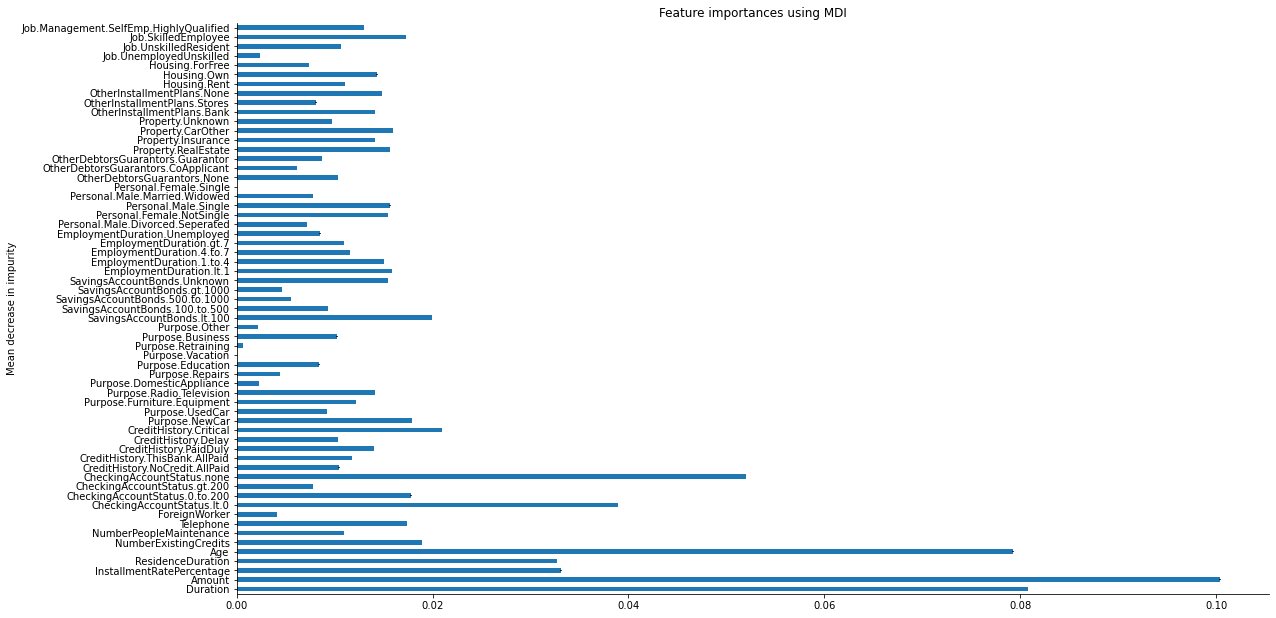

In [46]:
fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=importance_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.gca().spines[["right", "top"]].set_visible(False)
fig.set_size_inches(18.5, 10.5)
plt.show()

In [47]:
%%cache permutation_result.pkl permutation_result
permutation_result = permutation_importance(
    estimator=fitted_forest, X=data, y=y, scoring="roc_auc", n_jobs=-1, random_state=42
)

[Skipped the cell's code and loaded variables permutation_result from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\permutation_result.pkl'.]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished


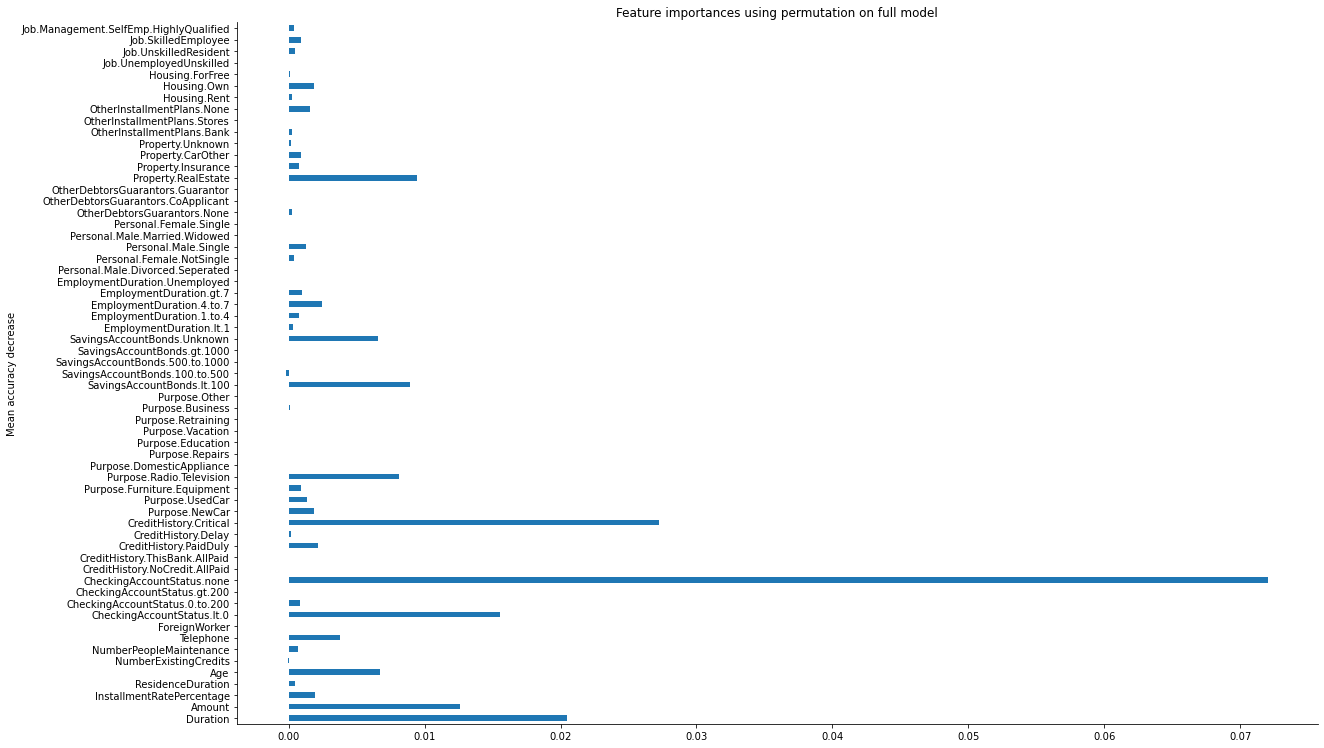

In [48]:
forest_importances_permute = pd.Series(permutation_result.importances_mean, index=data.columns)

fig, ax = plt.subplots()
forest_importances_permute.plot.barh(yerr=permutation_result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.gca().spines[["right", "top"]].set_visible(False)
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [49]:
# ! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [50]:
# Your code here!
from pdpbox import pdp

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished
[

(0.0, 0.08)

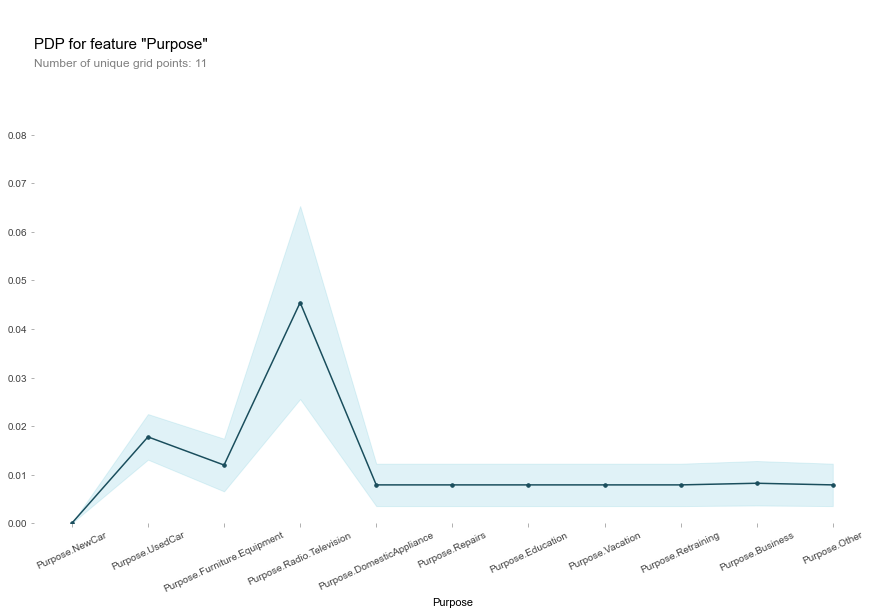

In [51]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp.pdp_isolate(
        model=fitted_forest,
        dataset=data,
        model_features=data.columns,
        feature=[
            "Purpose.NewCar",
            "Purpose.UsedCar",
            "Purpose.Furniture.Equipment",
            "Purpose.Radio.Television",
            "Purpose.DomesticAppliance",
            "Purpose.Repairs",
            "Purpose.Education",
            "Purpose.Vacation",
            "Purpose.Retraining",
            "Purpose.Business",
            "Purpose.Other",
        ],
    ),
    feature_name="Purpose",
    plot_params={"xticks_rotation": 25},
)
plt.grid(False)
plt.gca().set_ylim(ymax=0.08)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 185 out of 185 | elapsed:    0.0s finished


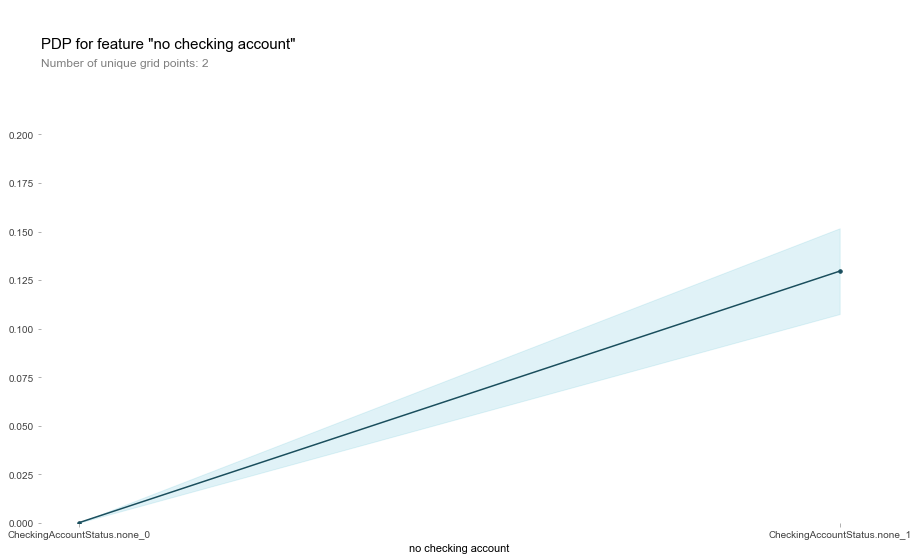

In [52]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp.pdp_isolate(
        model=fitted_forest,
        dataset=data,
        model_features=data.columns,
        feature="CheckingAccountStatus.none",
    ),
    feature_name="no checking account",
)
plt.gca().set_ylim(ymax=0.2)
plt.grid(False)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [53]:
# ! conda install -c anaconda py-xgboost

In [54]:
# ! conda install -c conda-forge catboost

In [55]:
# ! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [56]:
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
def get_xgb_cv_results():
    xgb_results = []
    for train_ix, test_ix in cv.split(data, y):
        X_train, X_test = data.astype("int").iloc[train_ix, :], data.astype("int").iloc[test_ix, :]
        y_train, y_test = y.astype("int").iloc[train_ix], y.astype("int").iloc[test_ix]
        xgb_fit = RandomizedSearchCV(
            estimator=xgb.XGBClassifier(
                verbosity=2,
                eval_metric="auc",
                seed=42,
            ),
            param_distributions={
                "eta": uniform(0.01, 0.29),
                "max_depth": list(range(3, 16)),
                "min_child_weight": list(range(1, 8)),
                "gamma": uniform(0.0, 0.4),
                "colsample_bytree": uniform(0.3, 1.0),
                "subsample": uniform(0.0, 1.0),
            },
            n_iter=50,
            scoring="roc_auc",
            n_jobs=-1,
            cv=cv,
            verbose=5,
            random_state=42,
        )
        xgb_fit.fit(X_train, y_train)
        xgb_results.append(roc_auc_score(y_test, xgb_fit.predict(X_test)))
    return xgb_results

In [58]:
%%cache xgb_cv_results.pkl xgb_cv_results
xgb_cv_results = get_xgb_cv_results()


[Skipped the cell's code and loaded variables xgb_cv_results from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\xgb_cv_results.pkl'.]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 2 pruned nodes, max_depth=7
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 4 pruned nodes, max_depth=7
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 2 pruned nodes, max_depth=7
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 2 pruned nodes, max_depth=7
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=7
[09:42:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 2 pruned nodes, max_depth=7
[09:42:47] INFO: 

In [59]:
def get_catboost_cv_results():
    catboost_results = []
    for train_ix, test_ix in cv.split(data, y):
        X_train, X_test = data.iloc[train_ix, :], data.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        catboost_fit = RandomizedSearchCV(
            estimator=CatBoostClassifier(
                cat_features=categorical_index, random_state=42
            ),
            param_distributions={
                "iterations": list(range(10, 101)),
                "learning_rate": uniform(0.01, 0.10),
                "depth": list(range(6, 11)),
                "l2_leaf_reg": list(range(1, 101)),
                "border_count": list(range(5, 201)),
            },
            n_iter=50,
            scoring="roc_auc",
            n_jobs=-1,
            cv=cv,
            verbose=5,
            random_state=42,
        ).fit(X_train, y_train)
        catboost_results.append(roc_auc_score(y_test, catboost_fit.predict(X_test)))
    return catboost_results

In [60]:
%%cache catboost_cv_results.pkl catboost_cv_results
catboost_cv_results = get_catboost_cv_results()

[Skipped the cell's code and loaded variables catboost_cv_results from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\catboost_cv_results.pkl'.]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.6602162	total: 144ms	remaining: 11.3s
1:	learn: 0.6330727	total: 146ms	remaining: 5.71s
2:	learn: 0.6098037	total: 149ms	remaining: 3.83s
3:	learn: 0.5908995	total: 152ms	remaining: 2.88s
4:	learn: 0.5756051	total: 154ms	remaining: 2.32s
5:	learn: 0.5620292	total: 157ms	remaining: 1.94s
6:	learn: 0.5487832	total: 160ms	remaining: 1.67s
7:	learn: 0.5375434	total: 163ms	remaining: 1.47s
8:	learn: 0.5285666	total: 166ms	remaining: 1.31s
9:	learn: 0.5187090	total: 169ms	remaining: 1.18s
10:	learn: 0.5091132	total: 172ms	remaining: 1.08s
11:	learn: 0.5001695	total: 175ms	remaining: 990ms
12:	learn: 0.4929472	total: 178ms	remaining: 915ms
13:	learn: 0.4887010	total: 181m

In [61]:
def get_lgbm_cv_results():
    lgbm_results = []
    for train_ix, test_ix in cv.split(data, y):
        X_train, X_test = data.iloc[train_ix, :], data.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        lgbm_fit = RandomizedSearchCV(
            estimator=lgb.LGBMClassifier(
                boosting_type="rf",
                random_state=42,
                n_jobs=-1,
                silent=False,
            ),
            param_distributions={
                "num_leaves": list(range(5, 91)),
                "max_depth": list(range(-1, 91)),
                "min_split_gain": uniform(0.0, 0.05),
                "min_child_samples": list(range(20, 31)),
                "learning_rate": uniform(0.01, 0.10),
                "n_estimators": list(range(50, 101)),
                "bagging_freq": list(range(1, 5)),
                "bagging_fraction": uniform(0.01, 0.98),
            },
            n_iter=50,
            scoring="roc_auc",
            n_jobs=-1,
            cv=cv,
            verbose=5,
            random_state=42,
        ).fit(X_train, y_train, eval_metric="auc")
        lgbm_results.append(roc_auc_score(y_test, lgbm_fit.predict(X_test)))
    return lgbm_results

In [62]:
%%cache lgbm_cv_results.pkl lgbm_cv_results
lgbm_cv_results = get_lgbm_cv_results()

[Skipped the cell's code and loaded variables lgbm_cv_results from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\lgbm_cv_results.pkl'.]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] bagging_fraction is set=0.19115736641501652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19115736641501652
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.19115736641501652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19115736641501652
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You c

In [63]:
five_scores = {
    "decision tree": (0.698, 0.044),
    "random forest": (0.778, 0.013),
    "xgb": (mean(xgb_cv_results), std(xgb_cv_results)),
    "catboost": (mean(catboost_cv_results), std(catboost_cv_results)),
    "lgbm": (mean(lgbm_cv_results), std(lgbm_cv_results)),
}
for model, score in five_scores.items():
    print(model, "\n\t{:.3f} ({:.3f})".format(*score))
    print()

decision tree 
	0.698 (0.044)

random forest 
	0.778 (0.013)

xgb 
	0.660 (0.012)

catboost 
	0.657 (0.019)

lgbm 
	0.625 (0.024)



In [64]:
print("Looks like default random forest wins for now.")
print("Let's try one more time without hyperparameter tuning.")
five_scores_new = five_scores.copy()

Looks like default random forest wins for now.
Let's try one more time without hyperparameter tuning.


In [65]:
%%cache new_xgb.pkl new_xgb
new_xgb = cross_val_score(
    estimator=xgb.XGBClassifier(
        verbosity=2,
        eval_metric="auc",
        seed=42,
    ),
    X=data.astype("int"),
    y=y.astype("int"),
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
)

[Skipped the cell's code and loaded variables new_xgb from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\new_xgb.pkl'.]


In [66]:
five_scores_new["xgb"] = new_xgb

In [67]:
%%cache new_catboost.pkl new_catboost
new_catboost = cross_val_score(
    estimator=CatBoostClassifier(
        cat_features=set(data.columns)
        - {
            "Duration",
            "Amount",
            "InstallmentRatePercentage",
            "ResidenceDuration",
            "Age",
            "NumberExistingCredits",
            "NumberPeopleMaintenance",
        },
        random_state=42,
    ),
    X=data,
    y=y,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
)

[Skipped the cell's code and loaded variables new_catboost from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\new_catboost.pkl'.]


In [68]:
five_scores_new["catboost"] = new_catboost

In [69]:
%%cache new_lgbm.pkl new_lgbm
new_lgbm = cross_val_score(
    estimator=lgb.LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        silent=False,
    ),
    X=data,
    y=y,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
)

[Skipped the cell's code and loaded variables new_lgbm from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\new_lgbm.pkl'.]


In [70]:
five_scores_new["lgbm"] = new_lgbm

In [71]:
for model, score in five_scores_new.items():
    print(model, "\n\t{:.3f} ({:.3f})".format(*score))
    print()

decision tree 
	0.698 (0.044)

random forest 
	0.778 (0.013)

xgb 
	0.740 (0.758)

catboost 
	0.783 (0.764)

lgbm 
	0.757 (0.766)



In [72]:
print("All three boosting models improved when used with default settings!")
print("Lessons learned:")
print("- Start with unadorned algorithms; it's faster and avoids unnecssary complexity.")
print("- Don't start with a pipeline; develop incrementally so you don't waste effort.")
print(
    "- Don't search hyperparameter spaces haphazardly; a more targeted approach could save you time."
)
print(
    "- Consider more data visualization up front and during tuning to get a better handle on the data."
)

All three boosting models improved when used with default settings!
Lessons learned:
- Start with unadorned algorithms; it's faster and avoids unnecssary complexity.
- Don't start with a pipeline; develop incrementally so you don't waste effort.
- Don't search hyperparameter spaces haphazardly; a more targeted approach could save you time.
- Consider more data visualization up front and during tuning to get a better handle on the data.


In [73]:
print("Earlier, 20/75 pipelines yielded NaN scores when cross validated.")
print("20/20 of these contain both SMOTENC and PCA.")
print("SMOTENC is always preceded by the scaler somewhere in the pipeline.")
print("These were the same pipelines that yielded NaN scores for the decision tree also.")
print()
nan_pipes = [
    "minmax-under-smotenc-pca",
    "minmax-smotenc-under-pca",
    "minmax-under-pca-smotenc",
    "minmax-smotenc-pca-under",
    "minmax-pca-under-smotenc",
    "minmax-pca-smotenc-under",
    "under-minmax-smotenc-pca",
    "under-minmax-pca-smotenc",
    "minmax-smotenc-pca",
    "minmax-pca-smotenc",
    "stasca-under-smotenc-pca",
    "stasca-smotenc-under-pca",
    "stasca-under-pca-smotenc",
    "stasca-smotenc-pca-under",
    "stasca-pca-under-smotenc",
    "stasca-pca-smotenc-under",
    "under-stasca-smotenc-pca",
    "under-stasca-pca-smotenc",
    "stasca-smotenc-pca",
    "stasca-pca-smotenc",
]
print(nan_pipes)

Earlier, 20/75 pipelines yielded NaN scores when cross validated.
20/20 of these contain both SMOTENC and PCA.
SMOTENC is always preceded by the scaler somewhere in the pipeline.
These were the same pipelines that yielded NaN scores for the decision tree also.

['minmax-under-smotenc-pca', 'minmax-smotenc-under-pca', 'minmax-under-pca-smotenc', 'minmax-smotenc-pca-under', 'minmax-pca-under-smotenc', 'minmax-pca-smotenc-under', 'under-minmax-smotenc-pca', 'under-minmax-pca-smotenc', 'minmax-smotenc-pca', 'minmax-pca-smotenc', 'stasca-under-smotenc-pca', 'stasca-smotenc-under-pca', 'stasca-under-pca-smotenc', 'stasca-smotenc-pca-under', 'stasca-pca-under-smotenc', 'stasca-pca-smotenc-under', 'under-stasca-smotenc-pca', 'under-stasca-pca-smotenc', 'stasca-smotenc-pca', 'stasca-pca-smotenc']


In [74]:
print("Let's investigate this further.")
print("First, let's try SMOTENC with nominally encoded categories.")
print("Note that Purpose.Vacation and Personal.Female.Single are all zeros.")

Let's investigate this further.
First, let's try SMOTENC with nominally encoded categories.
Note that Purpose.Vacation and Personal.Female.Single are all zeros.


In [75]:
for column in data.columns:
    valuecounts = data[column].value_counts()
    uniques = len(valuecounts)
    print(column, "has {} unique values".format(uniques))
    if uniques == 1:
        print(valuecounts)
    print()

Duration has 33 unique values

Amount has 921 unique values

InstallmentRatePercentage has 4 unique values

ResidenceDuration has 4 unique values

Age has 53 unique values

NumberExistingCredits has 4 unique values

NumberPeopleMaintenance has 2 unique values

Telephone has 2 unique values

ForeignWorker has 2 unique values

CheckingAccountStatus.lt.0 has 2 unique values

CheckingAccountStatus.0.to.200 has 2 unique values

CheckingAccountStatus.gt.200 has 2 unique values

CheckingAccountStatus.none has 2 unique values

CreditHistory.NoCredit.AllPaid has 2 unique values

CreditHistory.ThisBank.AllPaid has 2 unique values

CreditHistory.PaidDuly has 2 unique values

CreditHistory.Delay has 2 unique values

CreditHistory.Critical has 2 unique values

Purpose.NewCar has 2 unique values

Purpose.UsedCar has 2 unique values

Purpose.Furniture.Equipment has 2 unique values

Purpose.Radio.Television has 2 unique values

Purpose.DomesticAppliance has 2 unique values

Purpose.Repairs has 2 uniqu

In [76]:
def encode_ordinal(df, variable, categories):
    return OrdinalEncoder(categories=[categories], dtype="int").fit_transform(
        df[variable].to_numpy().reshape(-1, 1)
    )


def recode_and_smotenc(data, y):
    cat_df = data.copy()
    cat_df.Telephone = cat_df.Telephone.astype("bool")
    cat_df.ForeignWorker = cat_df.ForeignWorker.astype("bool")
    # reverse one hot
    for prefix in [
        "CheckingAccountStatus",
        "CreditHistory",
        "Purpose",
        "SavingsAccountBonds",
        "EmploymentDuration",
        "Personal",
        "OtherDebtorsGuarantors",
        "Property",
        "OtherInstallmentPlans",
        "Housing",
        "Job",
    ]:
        cat_df[prefix] = None
        for _ in cat_df.loc[:, cat_df.columns.str.startswith(prefix)].columns:
            if _ == prefix:
                pass
            else:
                variable, value = _.split(".", 1)
                cat_df[variable][cat_df[_] == 1] = value
                cat_df = cat_df.drop(_, axis="columns")
    cat_df = pd.concat(
        [
            cat_df.select_dtypes(exclude="object"),
            cat_df.select_dtypes(include="object").astype("category"),
        ],
        axis="columns",
    )
    cat_y = y.astype("category")
    
    # oversample
    cat_df, cat_y = SMOTENC(
        categorical_features=range(7, 20), random_state=42, n_jobs=-1
    ).fit_resample(cat_df, cat_y)

    # ordinal encoding
    for k, v in {
        "CheckingAccountStatus": ["none", "lt.0", "0.to.200", "gt.200"],
        "SavingsAccountBonds": [
            "Unknown",
            "lt.100",
            "100.to.500",
            "500.to.1000",
            "gt.1000",
        ],
        "EmploymentDuration": ["Unemployed", "lt.1", "1.to.4", "4.to.7", "gt.7"],
    }.items():
        cat_df[k] = encode_ordinal(cat_df, k, v)
    
    # one hot encode remaining categorical features
    cat_df = pd.get_dummies(cat_df, prefix_sep=".").drop(
        columns=[
            "CreditHistory.NoCredit.AllPaid",
            "OtherDebtorsGuarantors.None",
            "Property.Unknown",
            "OtherInstallmentPlans.None",
            "Housing.ForFree",
            "Job.UnemployedUnskilled",
        ]
    )
    
    return cat_df, cat_y

In [77]:
def get_smotenc_rf_results():
    cv_results = []
    for train_ix, test_ix in StratifiedKFold(
        n_splits=5, shuffle=True, random_state=42
    ).split(data, y):
        X_train, X_test = data.iloc[train_ix, :], data.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        X_test, y_test = recode_and_smotenc(X_test, y_test)
        X_train, y_train = recode_and_smotenc(X_train, y_train)
        # depending on the split, some features may be removed when converting between categorical and numerical
        # this always happens to features with only one unique value
        # if there are features present in only the test or train set, we'll drop them
        variables_to_drop = set(X_train.columns) - set(X_test.columns).union(
            set(X_test.columns) - set(X_train.columns)
        )
        for dropme in variables_to_drop:
            if dropme in X_train.columns:
                X_train = X_train.drop(columns=dropme)
            if dropme in X_test.columns:
                X_test = X_test.drop(columns=dropme)
        cv_results.append(
            roc_auc_score(
                y_test,
                RandomForestClassifier(random_state=42, n_jobs=-1)
                .fit(X_train, y_train)
                .predict(X_test),
            )
        )
    return cv_results

In [78]:
%%cache smotenc_rf_results.pkl smotenc_rf_results
smotenc_rf_results = get_smotenc_rf_results()
print()
print("smotenc_rf_results: {:.3f} ({:.3f})".format(mean(smotenc_rf_results), std(smotenc_rf_results)))
print("Unfortunately, this did not improve the random forest model.")
print("However, the score is better than the last SMOTENC-RF model trained with hyperparameter search (test score: 0.691 (0.042)).")

[Skipped the cell's code and loaded variables smotenc_rf_results from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\smotenc_rf_results.pkl'.]

smotenc_rf_results: 0.754 (0.026)
Unfortunately, this did not improve the random forest model.
However, the score is better than the last SMOTENC-RF model trained with hyperparameter search (test score: 0.691 (0.042)).


In [79]:
print(
    "Now let's look at one of the simpler PCA pipelines that failed: stasca-smotenc-pca."
)
print(
    "We'll try optimizing PCA hyperparameters as before with and without 'mle' as a possible value for n_components."
)

Now let's look at one of the simpler PCA pipelines that failed: stasca-smotenc-pca.
We'll try optimizing PCA hyperparameters as before with and without 'mle' as a possible value for n_components.


In [80]:
def scale(x, y, scaler):
    return make_column_transformer(
        (scaler, make_column_selector(dtype_exclude="category"))
    ).fit_transform(x, y)


numeric_columns = [
    "Duration",
    "Amount",
    "InstallmentRatePercentage",
    "ResidenceDuration",
    "Age",
    "NumberExistingCredits",
    "NumberPeopleMaintenance",
]


def get_stasca_smotenc_pca_rf_results(mle=[]):
    cv_results = []
    for train_ix, test_ix in StratifiedKFold(
        n_splits=5, shuffle=True, random_state=42
    ).split(data, y):
        X_train, X_test = data.iloc[train_ix, :], data.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # scale data
        X_train = pd.concat(
            [
                pd.DataFrame(
                    StandardScaler().fit_transform(
                        X_train.select_dtypes(exclude="category")
                    ),
                    columns=numeric_columns,
                    index=X_train.index,
                ),
                X_train.select_dtypes(include="category"),
            ],
            axis="columns",
        )
        X_test = pd.concat(
            [
                pd.DataFrame(
                    StandardScaler().fit_transform(
                        X_test.select_dtypes(exclude="category")
                    ),
                    columns=numeric_columns,
                    index=X_test.index,
                ),
                X_test.select_dtypes(include="category"),
            ],
            axis="columns",
        )

        # recode and smotenc
        X_train, y_train = recode_and_smotenc(X_train, y_train)
        X_test, y_test = recode_and_smotenc(X_test, y_test)
        variables_to_drop = set(X_train.columns) - set(X_test.columns).union(
            set(X_test.columns) - set(X_train.columns)
        )
        for dropme in variables_to_drop:
            if dropme in X_train.columns:
                X_train = X_train.drop(columns=dropme)
            if dropme in X_test.columns:
                X_test = X_test.drop(columns=dropme)

        # search hyperparameters for PCA
        model = RandomizedSearchCV(
            estimator=Pipeline(
                steps=[
                    ("pca", PCA(random_state=42)),
                    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1)),
                ]
            ),
            param_distributions={
                "pca__n_components": [None] + mle + list(range(2, 7)),
                "pca__whiten": [True, False],
                "pca__svd_solver": ["auto", "full", "arpack", "randomized"],
            },
            n_iter=50,
            scoring="roc_auc",
            n_jobs=-1,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            verbose=10,
            random_state=42,
        ).fit(X_train, y_train)

        cv_results.append(
            roc_auc_score(
                y_test,
                model.predict(X_test),
            )
        )
    return cv_results

In [81]:
%%cache with_mle.pkl with_mle
with_mle = get_stasca_smotenc_pca_rf_results(mle=["mle"])

[Skipped the cell's code and loaded variables with_mle from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\with_mle.pkl'.]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [82]:
%%cache without_mle.pkl without_mle
without_mle = get_stasca_smotenc_pca_rf_results()

[Skipped the cell's code and loaded variables without_mle from file 'C:\Users\michen\OneDrive - University of North Carolina at Chapel Hill\Desktop\Springboard\Springboard\mec-13.5.1-tree-based-algorithms-mini-project\without_mle.pkl'.]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [83]:
print("with mle: {:.3f} ({:.3f})".format(mean(with_mle), std(with_mle)))
print("without mle: {:.3f} ({:.3f})".format(mean(without_mle), std(without_mle)))

with mle: 0.705 (0.029)
without mle: 0.702 (0.031)


In [84]:
print("Success! No more NaN scores!")
print("It looks like MLE didn't make much of a difference in this comparison.")

Success! No more NaN scores!
It looks like MLE didn't make much of a difference in this comparison.
